# Pie Sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('darkgrid')

In [3]:
pie = pd.read_csv('pie.csv')
pie.head()

,Qsales,Price,Advert,CompPrice,Income,2Income,Popul,Time,Year,Quarter,City
0,26000,550,10.0,375,41.5,33,2300,8,1999,4,"Atlanta, GA"
1,25000,600,7.5,375,40.5,28,2300,7,1999,3,"Atlanta, GA"
2,24000,575,10.0,375,40.0,36,2250,6,1999,2,"Atlanta, GA"
3,25000,575,5.0,400,39.5,29,2250,5,1999,1,"Atlanta, GA"
4,27500,525,10.0,400,39.5,29,2200,4,1998,4,"Atlanta, GA"


In [4]:
pie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Qsales     48 non-null     int64  
 1   Price      48 non-null     int64  
 2   Advert     48 non-null     float64
 3   CompPrice  48 non-null     int64  
 4   Income     48 non-null     float64
 5   2Income    48 non-null     int64  
 6   Popul      48 non-null     int64  
 7   Time       48 non-null     int64  
 8   Year       48 non-null     int64  
 9   Quarter    48 non-null     int64  
 10  City       48 non-null     object 
dtypes: float64(2), int64(8), object(1)
memory usage: 4.2+ KB


In [5]:
pie.describe()

,Qsales,Price,Advert,CompPrice,Income,2Income,Popul,Time,Year,Quarter
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,25166.666667,579.166667,7.229167,386.458333,41.625000,28.562500,2421.666667,4.500000,1998.500000,2.500000
std,4899.341394,32.752023,3.544487,30.491686,4.305489,5.086094,2202.911597,2.315535,0.505291,1.129865
min,15000.000000,500.000000,2.500000,325.000000,34.000000,20.000000,480.000000,1.000000,1998.000000,1.000000
25%,22500.000000,550.000000,5.000000,375.000000,39.000000,24.000000,1425.000000,2.750000,1998.000000,1.750000
50%,25000.000000,575.000000,5.000000,387.500000,42.500000,29.000000,1675.000000,4.500000,1998.500000,2.500000
75%,27500.000000,600.000000,10.000000,400.000000,45.125000,33.000000,2212.500000,6.250000,1999.000000,3.250000
max,34000.000000,625.000000,15.000000,450.000000,47.500000,38.000000,7250.000000,8.000000,1999.000000,4.000000


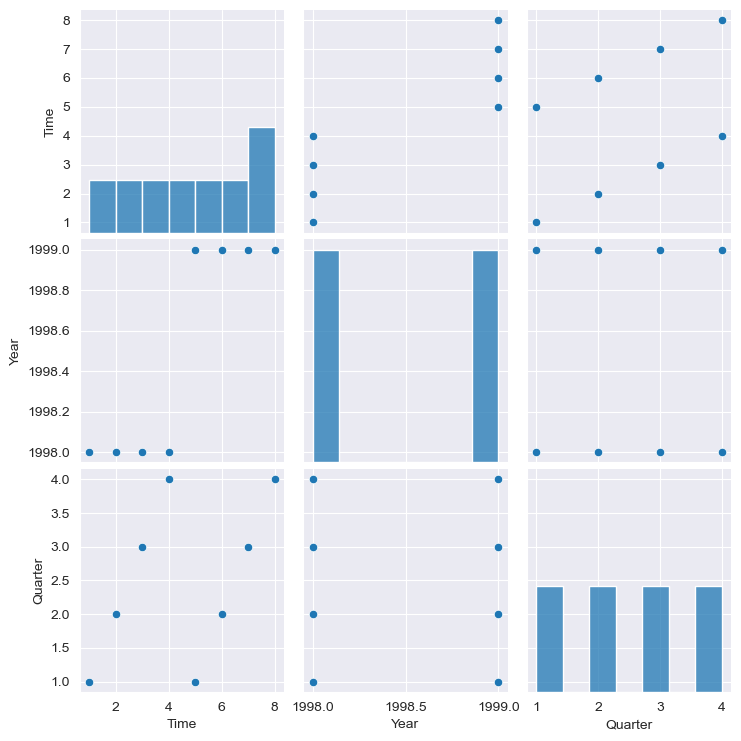

In [6]:
sns.pairplot(pie[['Time','Year','Quarter']])

In [7]:
pie['City'].value_counts()

City
Atlanta, GA           8
Baltimore, MD         8
Chicago, IL           8
Denver, CO            8
Erie, PA              8
Ft. Lauderdale, FL    8
Name: count, dtype: int64

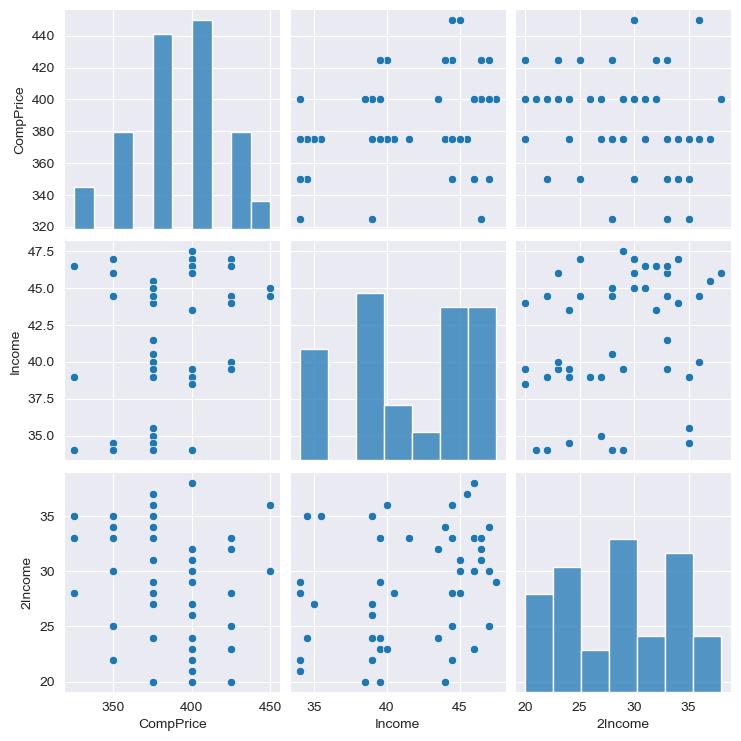

In [10]:
sns.pairplot(pie[['CompPrice','Income','2Income']])

In [14]:
pie.select_dtypes(exclude=[object]).corr()

,Qsales,Price,Advert,CompPrice,Income,2Income,Popul,Time,Year,Quarter
Qsales,1.000000,-0.306073,0.636702,0.364368,0.886859,0.216877,0.405932,0.209116,1.418099e-01,1.748836e-01
Price,-0.306073,1.000000,-0.347465,0.017754,-0.079214,-0.158061,-0.040978,0.112221,1.928473e-01,-1.149919e-01
Advert,0.636702,-0.347465,1.000000,0.063776,0.556462,0.050528,0.193725,0.055736,4.751898e-02,2.922031e-02
CompPrice,0.364368,0.017754,0.063776,1.000000,0.191443,-0.172779,-0.033827,0.022601,1.035715e-01,-1.389558e-01
Income,0.886859,-0.079214,0.556462,0.191443,1.000000,0.284320,0.424955,0.123782,1.026898e-01,6.997984e-02
2Income,0.216877,-0.158061,0.050528,-0.172779,0.284320,1.000000,0.253932,0.215891,2.028347e-01,7.960302e-02
Popul,0.405932,-0.040978,0.193725,-0.033827,0.424955,0.253932,1.000000,0.026049,2.265071e-02,1.286515e-02
Time,0.209116,0.112221,0.055736,0.022601,0.123782,0.215891,0.026049,1.000000,8.728716e-01,4.879500e-01
Year,0.141810,0.192847,0.047519,0.103572,0.102690,0.202835,0.022651,0.872872,1.000000e+00,-2.047263e-14
Quarter,0.174884,-0.114992,0.029220,-0.138956,0.069980,0.079603,0.012865,0.487950,-2.047263e-14,1.000000e+00


<Axes: >

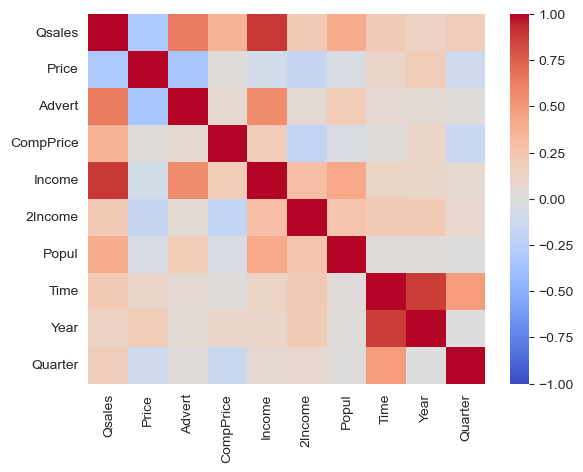

In [15]:
sns.heatmap(pie.select_dtypes(exclude=[object]).corr(), vmin=-1,vmax=1, cmap='coolwarm')

In [16]:
formula = 'Qsales ~ Price + CompPrice + Income + C(Quarter)'
pmodel = smf.ols(formula=formula, data=pie).fit()
pmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.897     
Dependent Variable:   Qsales             AIC:                  849.4591  
Date:                 2023-08-14 17:48   BIC:                  862.5575  
No. Observations:     48                 Log-Likelihood:       -417.73   
Df Model:             6                  F-statistic:          68.88     
Df Residuals:         41                 Prob (F-statistic):   7.81e-20  
R-squared:            0.910              Scale:                2.4834e+06
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|     [0.025     0.975] 
-------------------------------------------------------------------------
Intercept       -9798.7587 5501.5830 -1.7811 0.0823 -20909.4309 1311.9136
C(Quarter)[T.2]  -179.4371  644.4579 -0.2784 0.7821  -1480.9463 1122.0721
C(Quarter)[T.3]  1721.9197  667.6647  2.5790 0.0136    373.5434 3070.2960
C(Quarter)[T.4]  1207.7257  650.0904  1.8578 0.0704   -105.1584 2520.6099
Price             -34.9857    7.0902 -4.9344 0.0000    -49.3047  -20.6667
CompPrice          41.7853    8.1255  5.1425 0.0000     25.3756   58.1950
Income            922.3341   54.8999 16.8003 0.0000    811.4616 1033.2067
-------------------------------------------------------------------------
Omnibus:                 1.511           Durbin-Watson:             2.036
Prob(Omnibus):           0.470           Jarque-Bera (JB):          1.417
Skew:                    -0.303          Prob(JB):                  0.492
Kurtosis:                2.416           Condition No.:             16896
=========================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
formula = 'Qsales ~ Price + CompPrice + Income + C(Quarter) + Advert'
pmodel = smf.ols(formula=formula, data=pie).fit()
pmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.905     
Dependent Variable:    Qsales             AIC:                  846.3803  
Date:                  2023-08-14 17:51   BIC:                  861.3499  
No. Observations:      48                 Log-Likelihood:       -415.19   
Df Model:              7                  F-statistic:          64.67     
Df Residuals:          40                 Prob (F-statistic):   8.40e-20  
R-squared:             0.919              Scale:                2.2899e+06
--------------------------------------------------------------------------
                   Coef.     Std.Err.    t    P>|t|     [0.025     0.975] 
--------------------------------------------------------------------------
Intercept       -11250.7507 5327.4263 -2.1119 0.0410 -22017.8809 -483.6204
C(Quarter)[T.2]   -250.6891  619.7615 -0.4045 0.6880  -1503.2739 1001.8956
C(Quarter)[T.3]   1487.1934  650.6815  2.2856 0.0277    172.1170 2802.2697
C(Quarter)[T.4]   1342.5035  627.5026  2.1394 0.0386     74.2735 2610.7335
Price              -28.9000    7.3926 -3.9093 0.0003    -43.8410  -13.9591
CompPrice           41.5965    7.8030  5.3308 0.0000     25.8260   57.3670
Income             844.5788   64.2918 13.1366 0.0000    714.6402  974.5175
Advert             177.0169   83.7795  2.1129 0.0409      7.6922  346.3416
--------------------------------------------------------------------------
Omnibus:                  1.765           Durbin-Watson:             2.153
Prob(Omnibus):            0.414           Jarque-Bera (JB):          1.334
Skew:                     -0.191          Prob(JB):                  0.513
Kurtosis:                 2.279           Condition No.:             17038
==========================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
# plot residuals
resid = pmodel.resid
pred = pmodel.fittedvalues

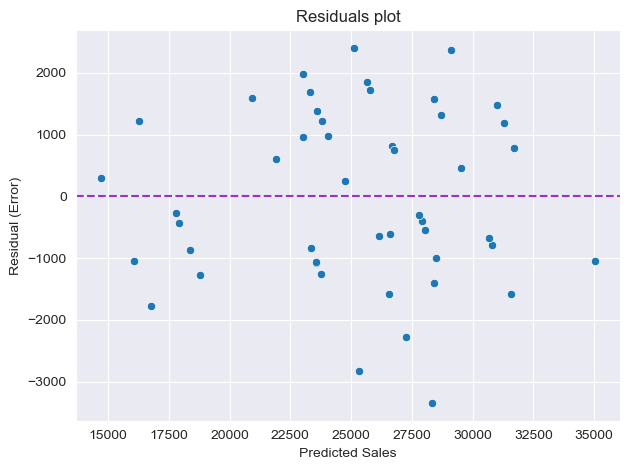

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(x=pred, y=resid, ax=ax)
ax.set_title('Residuals plot')
ax.set_ylabel('Residual (Error)')
ax.set_xlabel('Predicted Sales')
plt.axhline(y=0, color='darkorchid', linestyle='--')
fig.tight_layout()


## LOWESS - Locally Weighted Scatterplot Smoothing

In [23]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    It uses Locally Weighted Scatterplot Smoothing (LOWESS) to fit a model. 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    pred = model.fittedvalues
    influence = model.get_influence()
    resid_std = influence.resid_studentized_internal
    
    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))
    
    sns.regplot(x=pred, y=y, lowess=True, ax=ax[0], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=yhat) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[min(pred), max(pred)], 
                 ax=ax[0], color='red', ls=':')
    ax[0].set_title('Observed vs. Predicted Values')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Observed')
    
    sns.regplot(x=pred, y=resid_std, lowess=True, ax=ax[1], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Residuals vs. Predicted Values')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Standardized Residual')
    
    return fig, ax

(<Figure size 750x350 with 2 Axes>,
 array([<Axes: title={'center': 'Observed vs. Predicted Values'}, xlabel='Predicted', ylabel='Observed'>,
        <Axes: title={'center': 'Residuals vs. Predicted Values'}, xlabel='Predicted', ylabel='Standardized Residual'>],
       dtype=object))

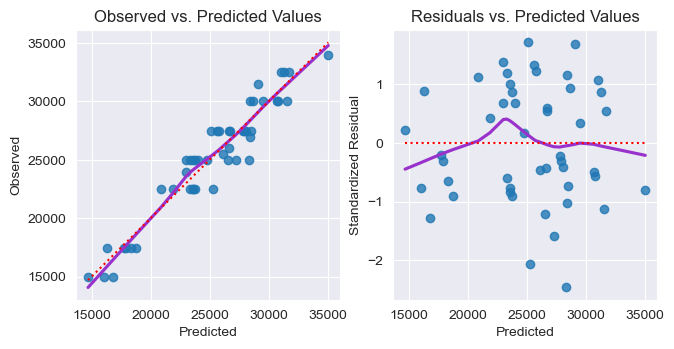

In [24]:
linearity_test(pmodel, pie['Qsales'])

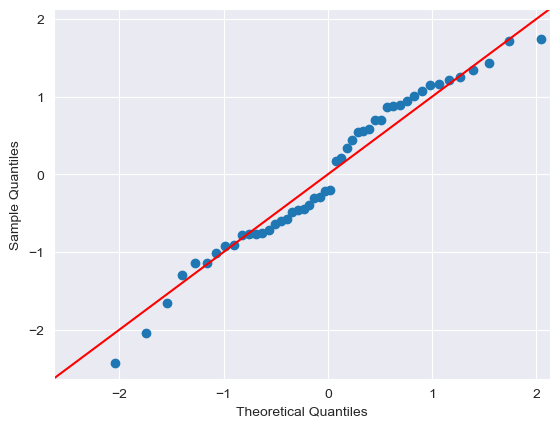

In [26]:
smg.qqplot(resid, fit=True, line='45')
plt.show()

In [27]:
stats.shapiro(resid)

ShapiroResult(statistic=0.96501225233078, pvalue=0.1607760637998581)

In [29]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
y, X = dmatrices(formula, data=pie, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) for ii in range(X.shape[1])]
vif['Feature'] = X.columns
vif

,VIF,Feature
0,594.912068,Intercept
1,1.509622,C(Quarter)[T.2]
2,1.664010,C(Quarter)[T.3]
3,1.547569,C(Quarter)[T.4]
4,1.203216,Price
5,1.161887,CompPrice
6,1.572647,Income
7,1.809909,Advert


In [32]:
influence = pmodel.get_influence()
resid_z = influence.resid_studentized_internal
resid_student = influence.resid_studentized_external

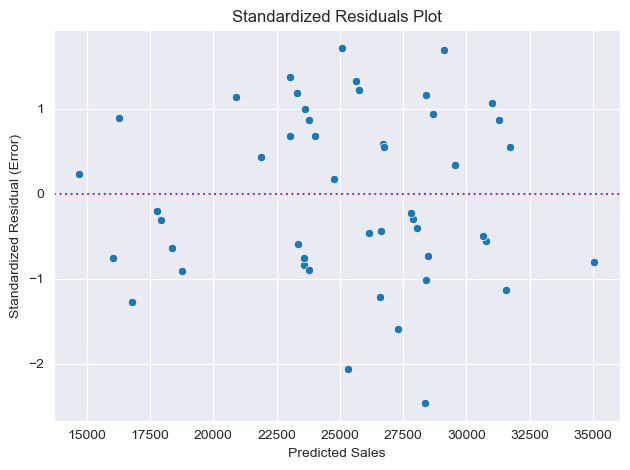

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x=pred, y=resid_z, ax=ax)
ax.set_title('Standardized Residuals Plot')
ax.set_ylabel('Standardized Residual (Error)')
ax.set_xlabel('Predicted Sales')
plt.axhline(y=0, color='darkorchid', ls=':')
fig.tight_layout()

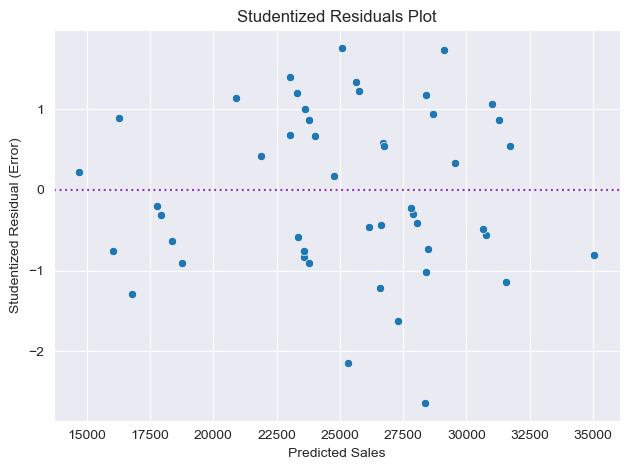

In [34]:
fig, ax = plt.subplots()
sns.scatterplot(x=pred, y=resid_student, ax=ax)
ax.set_title('Studentized Residuals Plot')
ax.set_ylabel('Studentized Residual (Error)')
ax.set_xlabel('Predicted Sales')
fig.tight_layout()
plt.axhline(y=0, color='darkorchid', ls=':')
plt.show()

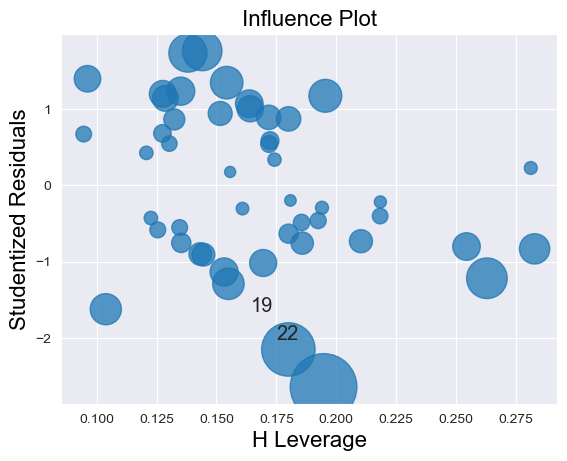

In [36]:
fig, ax = plt.subplots()
smg.influence_plot(pmodel, ax=ax)
plt.show()

In [37]:
pie.loc[[19,22]]

,Qsales,Price,Advert,CompPrice,Income,2Income,Popul,Time,Year,Quarter,City
19,22500,600,10.0,350,44.5,22,7150,5,1999,1,"Chicago, IL"
22,25000,600,5.0,450,44.5,36,7100,2,1998,2,"Chicago, IL"


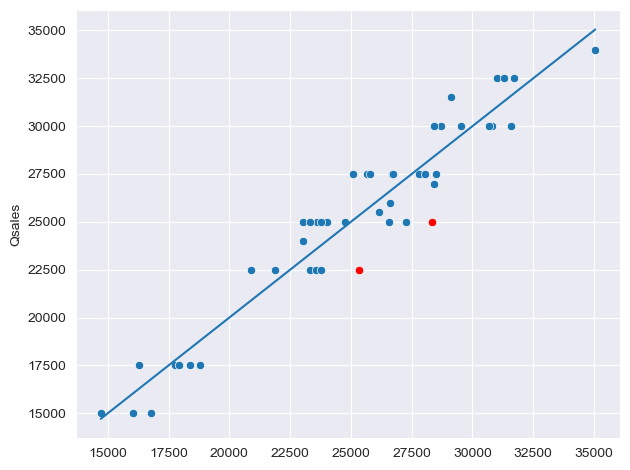

In [38]:
fig, ax = plt.subplots()
sns.scatterplot(x=pred, y=pie['Qsales'], ax=ax)
sns.scatterplot(x=pred[[19,22]], y=pie['Qsales'][[19,22]], ax=ax, color='red')
sns.lineplot(x=pred, y=pred)

fig.tight_layout()